In [31]:
import random
import os
import re
import nltk
nltk.download('punkt')
from os import path
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
d = os.getcwd()
text_pre = open('Abstract_all.txt', encoding = "utf8").read()
doc_l = str.split(text_pre, sep = 'SEP')

doc_complete = doc_l

doc_out = []
for l in doc_l:
    cleantextprep = str(l)
    expression = "[^a-zA-Z ]" # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, ' ', cleantextprep) # apply regex
    cleantextCAP = re.sub('\s+', ' ', cleantextCAP) # apply regex
    cleantext = cleantextCAP.lower() # lower case 
    bound = ''.join(cleantext)
    doc_out.append(bound)

doc_complete = doc_out

stop = set(stopwords.words('english'))
stop = stop.union({'result','keywords','study','using','paper','abstract','f','x','e','result','topic','proposed','one'})
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
import nltk
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]  

In [33]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50, random_state = 3154)

K=6
topicWordProbMat=ldamodel.print_topics(K)


columns = ['1','2','3','4','5','6']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)

zz = np.zeros(shape=(100,K))

last_number=0
DC={}

for x in range (100):
  data = pd.DataFrame({columns[0]:"",
                     columns[1]:"",
                     columns[2]:"",
                     columns[3]:"",
                     columns[4]:"",
                     columns[5]:"",   
                    },index=[0])
  df=df.append(data,ignore_index=True)  

for line in topicWordProbMat:
    tp, w = line
    probs=w.split("+")
    y=0
    for pr in probs:         
        a=pr.split("*")
        df.iloc[y,tp] = a[1]
        a[1] = a[1].strip()
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize=(80,25))
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='center',
                 verticalalignment='center'
                 )

In [34]:
print (df[:10])

                 1             2             3               4                    5                 6
0         "model"       "model"       "model"        "market"              "asset"           "model" 
1          "risk"        "data"      "market"        "effect"               "risk"          "method" 
2  "distribution"    "response"        "time"         "price"          "sentiment"        "variable" 
3   "correlation"    "estimate"        "risk"          "data"           "analysis"          "market" 
4          "tail"      "uplift"     "network"   "performance"             "return"        "adaptive" 
5      "approach"    "customer"        "jump"     "portfolio"   "cryptocurrencies"   "nonparametric" 
6     "portfolio"        "bank"        "data"      "research"                "frm"       "procedure" 
7        "stress"        "cost"   "parameter"          "high"     "cryptocurrency"            "data" 
8    "inequality"   "targeting"     "bitcoin"          "risk"             "sector"

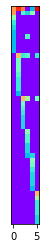

In [35]:
plt.imshow(zz, cmap='rainbow', interpolation='nearest')
plt.yticks([])
plt.savefig("heatmap_abstract.png", transparent = True, dpi=400)